In [5]:
ls '../2_multiclass_classification'

__pycache__/                process.py
ann_predict.ipynb           process.pyc
ecommerce_preprocess.ipynb  softmax.ipynb
forward_prop.ipynb


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.utils import shuffle

sys.path.append('../2_multiclass_classification')
from process import get_data

In [6]:
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [18]:
X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)
M = 5
D = X.shape[1]
K = len(set(Y))

In [19]:
X_train = X[:-100]
Y_train = Y[:-100]
Y_train_ind = y2indicator(Y_train, K)
X_test = X[-100:]
Y_test = Y[-100:]
Y_test_ind = y2indicator(Y_test, K)

In [20]:
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

In [21]:
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis = 1, keepdims = True)

In [22]:
def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z # return Z now, too

In [23]:
def predict(probY):
    return np.argmax(probY, axis = 1)

In [24]:
def accuracy(Y, preds):
    return np.mean(Y == preds)

In [25]:
def cross_entropy(T, preds):
    return -np.mean(T * np.log(preds))

In [26]:
train_costs = []
test_costs  = []
eta = 0.001
print('     \tError')
print('Epoch\t(train)\t(test)')

for i in range(10000):
    # Forward prop
    pY_train, Z_train = forward(X_train, W1, b1, W2, b2)
    pY_test,  Z_test  = forward(X_test,  W1, b1, W2, b2)
    
    # Record error
    c_train = cross_entropy(Y_train_ind, pY_train)
    c_test  = cross_entropy(Y_test_ind,  pY_test)
    train_costs.append(c_train)
    test_costs.append(c_test)
    
    # Gradient descent
    W2 -= eta * Z_train.T.dot(pY_train - Y_train_ind)
    b2 -= eta * (pY_train - Y_train_ind).sum()
    dZ = (pY_train - Y_train_ind).dot(W2.T) * (1 - Z_train * Z_train)
    W1 -= eta * X_train.T.dot(dZ)
    b1 -= eta * dZ.sum(axis = 0)
    
    # Output progress
    if i % 1000 == 0:
        print('%5d\t%.4f\t%.4f' %(i, c_train, c_test))
        
print(
    'Accuracy (train): %.4f\t(test): %.4f' 
    %(accuracy(Y_train, predict(pY_train)), 
      accuracy(Y_test, predict(pY_test))))

     	Error
Epoch	(train)	(test)
    0	0.6393	0.5924
 1000	0.0602	0.0729
 2000	0.0528	0.0688
 3000	0.0494	0.0690
 4000	0.0474	0.0708
 5000	0.0462	0.0728
 6000	0.0452	0.0748
 7000	0.0445	0.0766
 8000	0.0440	0.0782
 9000	0.0435	0.0797
Accuracy (train): 0.9025	(test): 0.9000


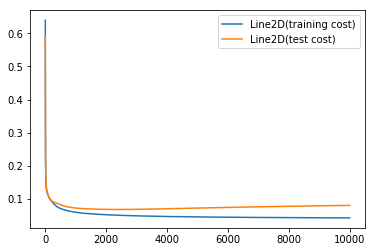

In [27]:
legend1, = plt.plot(train_costs, label = 'training cost')
legend2, = plt.plot(test_costs,  label = 'test cost')
plt.legend([legend1, legend2]);
plt.show();